<a href="https://colab.research.google.com/github/FUF1/naw-omr/blob/main/OMR-True-False-Recognition%20successfull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import requests as req
from PIL import Image

In [121]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /gdrive
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-121-cd0a7580851e>", line 3, in <module>
    get_ipython().magic('cd /gdrive')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-84>", line 2, in cd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the abo

OSError: ignored

In [122]:
img = "/gdrive/MyDrive/RescueOMR_NAW-Test/Random_Einzelseiten/TESTKOPIE_L105_NAW-1_komplett_Page_001.png"

In [123]:
!pip install boxdetect
from boxdetect import config

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
The folder you are executing pip from can no longer be found.


In [124]:
import matplotlib.pyplot as plt

In [125]:
cfg = config.PipelinesConfig()
# important to adjust these values to match the size of boxes on your image
cfg.width_range = (21,28)
cfg.height_range = (21,28)

# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [0.7]

# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.8, 1.2)

# group_size_range starting from 2 will skip all the groups
# with a single box detected inside (like checkboxes)
cfg.group_size_range = (1, 1)

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

In [ ]:
from boxdetect.pipelines import get_checkboxes

checkboxes = get_checkboxes(
    img, cfg=cfg, px_threshold=0.4, plot=False, verbose=True) #px_threshold=0.1

In [ ]:
print(checkboxes)

Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (688, 928, 26, 23)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


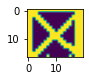

Checkbox bounding rectangle (x,y,width,height):  (688, 962, 24, 25)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


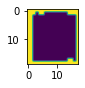

Checkbox bounding rectangle (x,y,width,height):  (688, 997, 24, 24)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


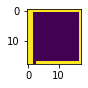

Checkbox bounding rectangle (x,y,width,height):  (689, 1032, 23, 24)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


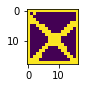

Checkbox bounding rectangle (x,y,width,height):  (689, 1065, 23, 25)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


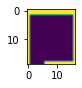

In [132]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()